In [3]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

circuitos=pd.read_excel('dataset_pfinal_ANS_V2.xlsx')
circuitos.set_index(['Id'],inplace=True)

In [4]:
# Estadistcas Descriptivas

print(circuitos.shape)
print(circuitos.describe().T)
circuitos.describe().T.to_excel('circuitos_estadisticas_V2.xlsx')



(1097, 122)
                                                  count          mean           std     min          25%          50%           75%           max
Nominal Voltage Level                            1097.0  1.407730e+01  6.792377e+00  11.400    11.400000    11.400000     13.200000     34.500000
Potencia TIEPI                                   1097.0  7.612237e+03  6.372463e+03   0.000  2793.000000  6581.000000  10884.000000  36510.000000
Total Length                                     1097.0  2.531673e+01  3.774992e+01   0.001     6.468000    10.834000     22.559000    362.351000
out of which Overhead Bare Conductor             1097.0  2.044705e+01  3.775315e+01   0.000     2.011000     4.983000     17.382000    361.442000
out of which Overhead Cable                      1097.0  1.227768e+00  2.517699e+00   0.000     0.000000     0.189000      1.344000     24.480000
out of which Underground Cable                   1097.0  3.641998e+00  4.380623e+00   0.000     0.634000     2.4

In [7]:
# Caracterizacion variables
from numpy import float64

def tipo_variable(variable):
  if variable== object:
    return 'categórica'
  elif  ((variable == float) or (variable == int)) :
    return 'numérica'
  else: return variable

circuitos.info()
df_datatypes = pd.DataFrame(circuitos.dtypes, columns=['tipo_variable'])
df_datatypes['tipo_variable']=df_datatypes.apply(lambda x:tipo_variable(x['tipo_variable']),axis=1)
df_datatypes.to_excel('circuitos_caracterizacion_variables_V2.xlsx')
df_datatypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 1 to 1097
Columns: 122 entries, Substation Name to Municipio/Localidad
dtypes: float64(77), int64(37), object(8)
memory usage: 1.0+ MB


tipo_variable
Substation Name                                    categórica
Transformer                                        categórica
MV Feeder Code                                     categórica
Feeder Name MV                                     categórica
Nominal Voltage Level                                numérica
Potencia TIEPI                                       numérica
Total Length                                         numérica
out of which Overhead Bare Conductor                 numérica
out of which Overhead Cable                          numérica
out of which Underground Cable                       numérica
Single Phase Network                                 numérica
Triple phase Network                                 numérica
Tot Manual Switches-IMS-disconnectors nodes          numérica
Tot Remote Control Points nodes                      numérica
Tot Remote Control Points with automation nodes      numérica
Fuses on the line                                    numérica
Fusesaver/Tripsaver on the line                      numérica
Tickets Remote control opened                        numérica
Lev 1 Anomalies (including backlog)                  numérica
Lev 2 Anomalies including backlog                    numérica
REPORTETELCO AnexohojaCondiciones                  categórica
Tickets_BT                                           numérica
Mes_1_SAIDI                                          numérica
Mes_2_SAIDI                                          numérica
Mes_3_SAIDI                                          numérica
Mes_4_SAIDI                                          numérica
Mes_5_SAIDI                                          numérica
Mes_6_SAIDI                                          numérica
Mes_7_SAIDI                                          numérica
Mes_8_SAIDI                                          numérica
Mes_9_SAIDI                                          numérica
Mes_10_SAIDI                                         numérica
Mes_11_SAIDI                                         numérica
Mes_12_SAIDI                                         numérica
DOCUMENTALCFM                                        numérica
EXTERNAL                                             numérica
OTHER CAUSES                                         numérica
PLANNED WITH NOTICE                                  numérica
PLANNED WITHOUT NOTICE                               numérica
THIRDPARTIES                                         numérica
ACTIVIDADES DE TERCEROS                              numérica
ANIMALES                                             numérica
ARBOLES                                              numérica
CLIENTE                                              numérica
CLIENTE SOLICITUD USUARIOS                           numérica
COMETAS                                              numérica
DEGRADACION MATERIAL                                 numérica
DESC_ ATMOSFERICA IRRESISTIBLE E IMPREVISIBLE        numérica
DESCARGA ATMOSFERICA (RAYO)                          numérica
DESCONEXION POR SUSPENSION DEL SERVICIO              numérica
DISPARO ACCIDENTAL                                   numérica
ERROR CENTRO DE OPERACION                            numérica
ERROR MANIOBRA                                       numérica
ERROR MANTENIMIENTO                                  numérica
ERROR MONTAJE O INSTALACION                          numérica
ERROR OPERADOR DE TERRENO                            numérica
ERROR PROCEDIMIENTO, CONSIGNACION                    numérica
EXCAVADORAS                                          numérica
EXIGENCIA TRASLADO INFRAESTRUCTURA                   numérica
FALLA ACTIVO NT 1 PROPIEDAD DEL USUARIO              numérica
FALLA ALIMENTADOR 34,5 KV                            numérica
FALLA EN B_T_                                        numérica
FALLO EQUIPO CONTROL                                 numérica
FALLO MATERIAL                                       numérica
FALTA MANTENIMIENT

In [8]:
circuitos_null_count = circuitos.count()
circuitos_null_count
df=circuitos.isna().sum().to_frame(name='conteo_nulos')
df.sort_values(by=['conteo_nulos'], ascending=False, inplace=True)
df.to_excel('circuitos_datos faltantes_V2.xlsx')
df

conteo_nulos
Substation Name                                             0
PROBLEMAS ORDEN PUBLICO                                     0
POLUCION                                                    0
PODAS ARBOLES                                               0
PERSONAS-ACCIDENTAL                                         0
OTRAS CAUSAS PROPIAS INTERNAS                               0
OTRAS CAUSAS PROPIAS EXTERNAS                               0
OTRAS CAUSAS DE TERCEROS                                    0
OTRAS CAUSAS ATMOSFERICAS                                   0
OTRA DISTRIBUIDORA                                          0
NUEVAS INSTALACIONES                                        0
NO DETERMINADA                                              0
NECESIDADES PROPIAS URGENTES                                0
NECESIDADES AJENAS                                          0
MOVIMIENTO NATURAL TIERRAS                                  0
MEJORAS DE RED                                              0
MATERIAL INADECUADO                                         0
MANTENIMIENTO REGLAMENTARIO                                 0
MANTENIMIENTO PREVENTIVO                                    0
MANTENIMIENTO ALIMENTADOR 34,5 KV                           0
LLUVIA                                                      0
INUNDACION, RIADA                                           0
INTERFERENCIA DE ELEMENTO TEMPORADA DE VIENTOS              0
INSTALACION E INTERFERENCIA CLIENTE                         0
INCENDIO                                                    0
HUMEDAD                                                     0
GOLPE DE PICO                                               0
FALTA MANTENIMIENTO                                         0
FALLO MATERIAL                                              0
POSTE ESTRELLADO                                            0
PRODUCCION                                                  0
Transformer                                                 0
PROGRAMA ANUAL DE REMODELACION O REPOSICION                 0
ZONANUEVA                                                   0
Tipo                                                        0
Clientes_Total                                              0
Clientes_Alumbrado P                                        0
Clientes_Oficial                                            0
Clientes_Industrial                                         0
Clientes_Comercial                                          0
Clientes_Residencial                                        0
VIENTO                                                      0
VENDAVAL                                                    0
VEHICULOS-ACCIDENTAL                                        0
VANDALISMO                                                  0
VACIO                                                       0
TERRORISMO                                                  0
SUBESTACION INUNDADA                                        0
STR VENDAVAL                                                0
STR NO DETERMINADA                                          0
STR NECESIDADES PROPIAS URGENTES                            0
STR MANTENIMIENTO PREVENTIVO                                0
STR INSTALACION E INTERFERENCIA CLIENTE                     0
STR DESCARGA ATMOSFERICA (RAYO)                             0
STR ARBOLES                                                 0
SOBRECARGA                                                  0
SERVIDUMBRE ARBOLES                                         0
SEGURIDAD CIUDADANA                                         0
RIESGO DE LA VIDA HUMANA                                    0
REGULACION                                                  0
FALLO EQUIPO CONTROL                                        0
FALLA EN B_T_                                               0
FALLA ALIMENTADOR 34,5 KV                                   0
FALLA ACTIVO NT 1 PROPIEDAD DEL USUARIO                     0
Mes_7_SAIDI        

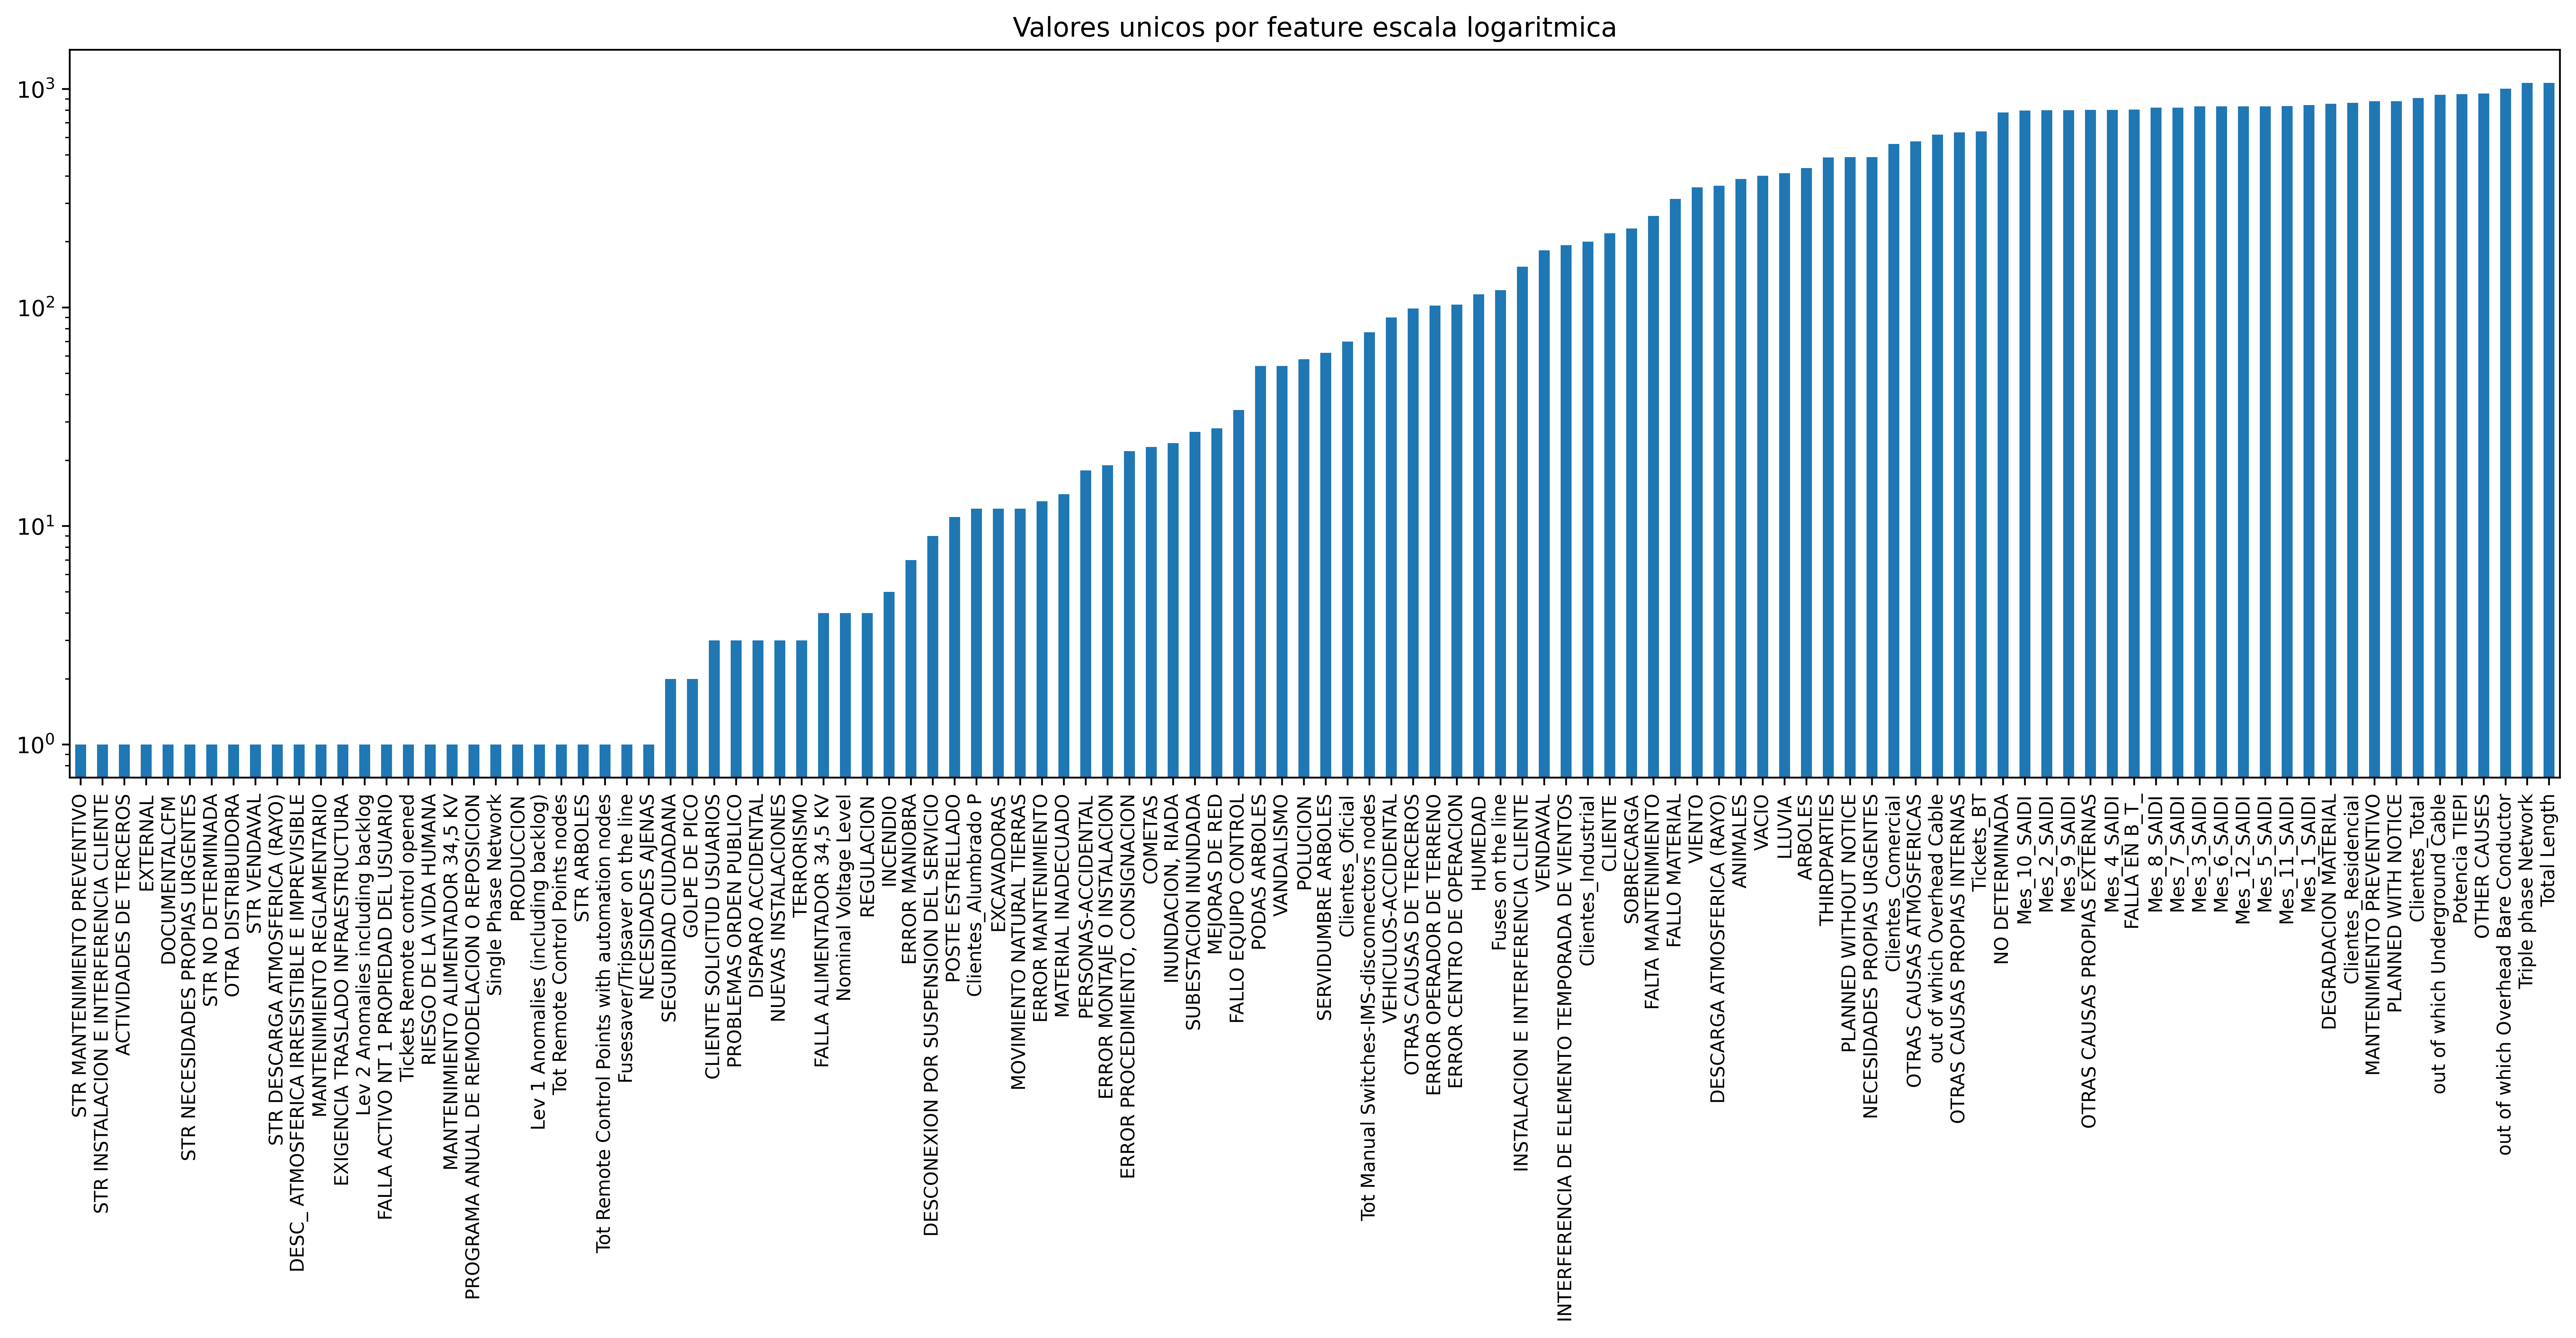

In [10]:
plt.rcParams["figure.dpi"] = 500
# Unicos valores por feature
unique_values = circuitos.select_dtypes(include="number").nunique().sort_values()

# Plot uncios valores en escala logaritmica
unique_values.plot.bar(logy=True, figsize=(20,6), title="Valores unicos por feature escala logaritmica");
plt.xticks(fontsize='small', rotation=90)
plt.savefig('unicos_valores.png', format='png', dpi=300)

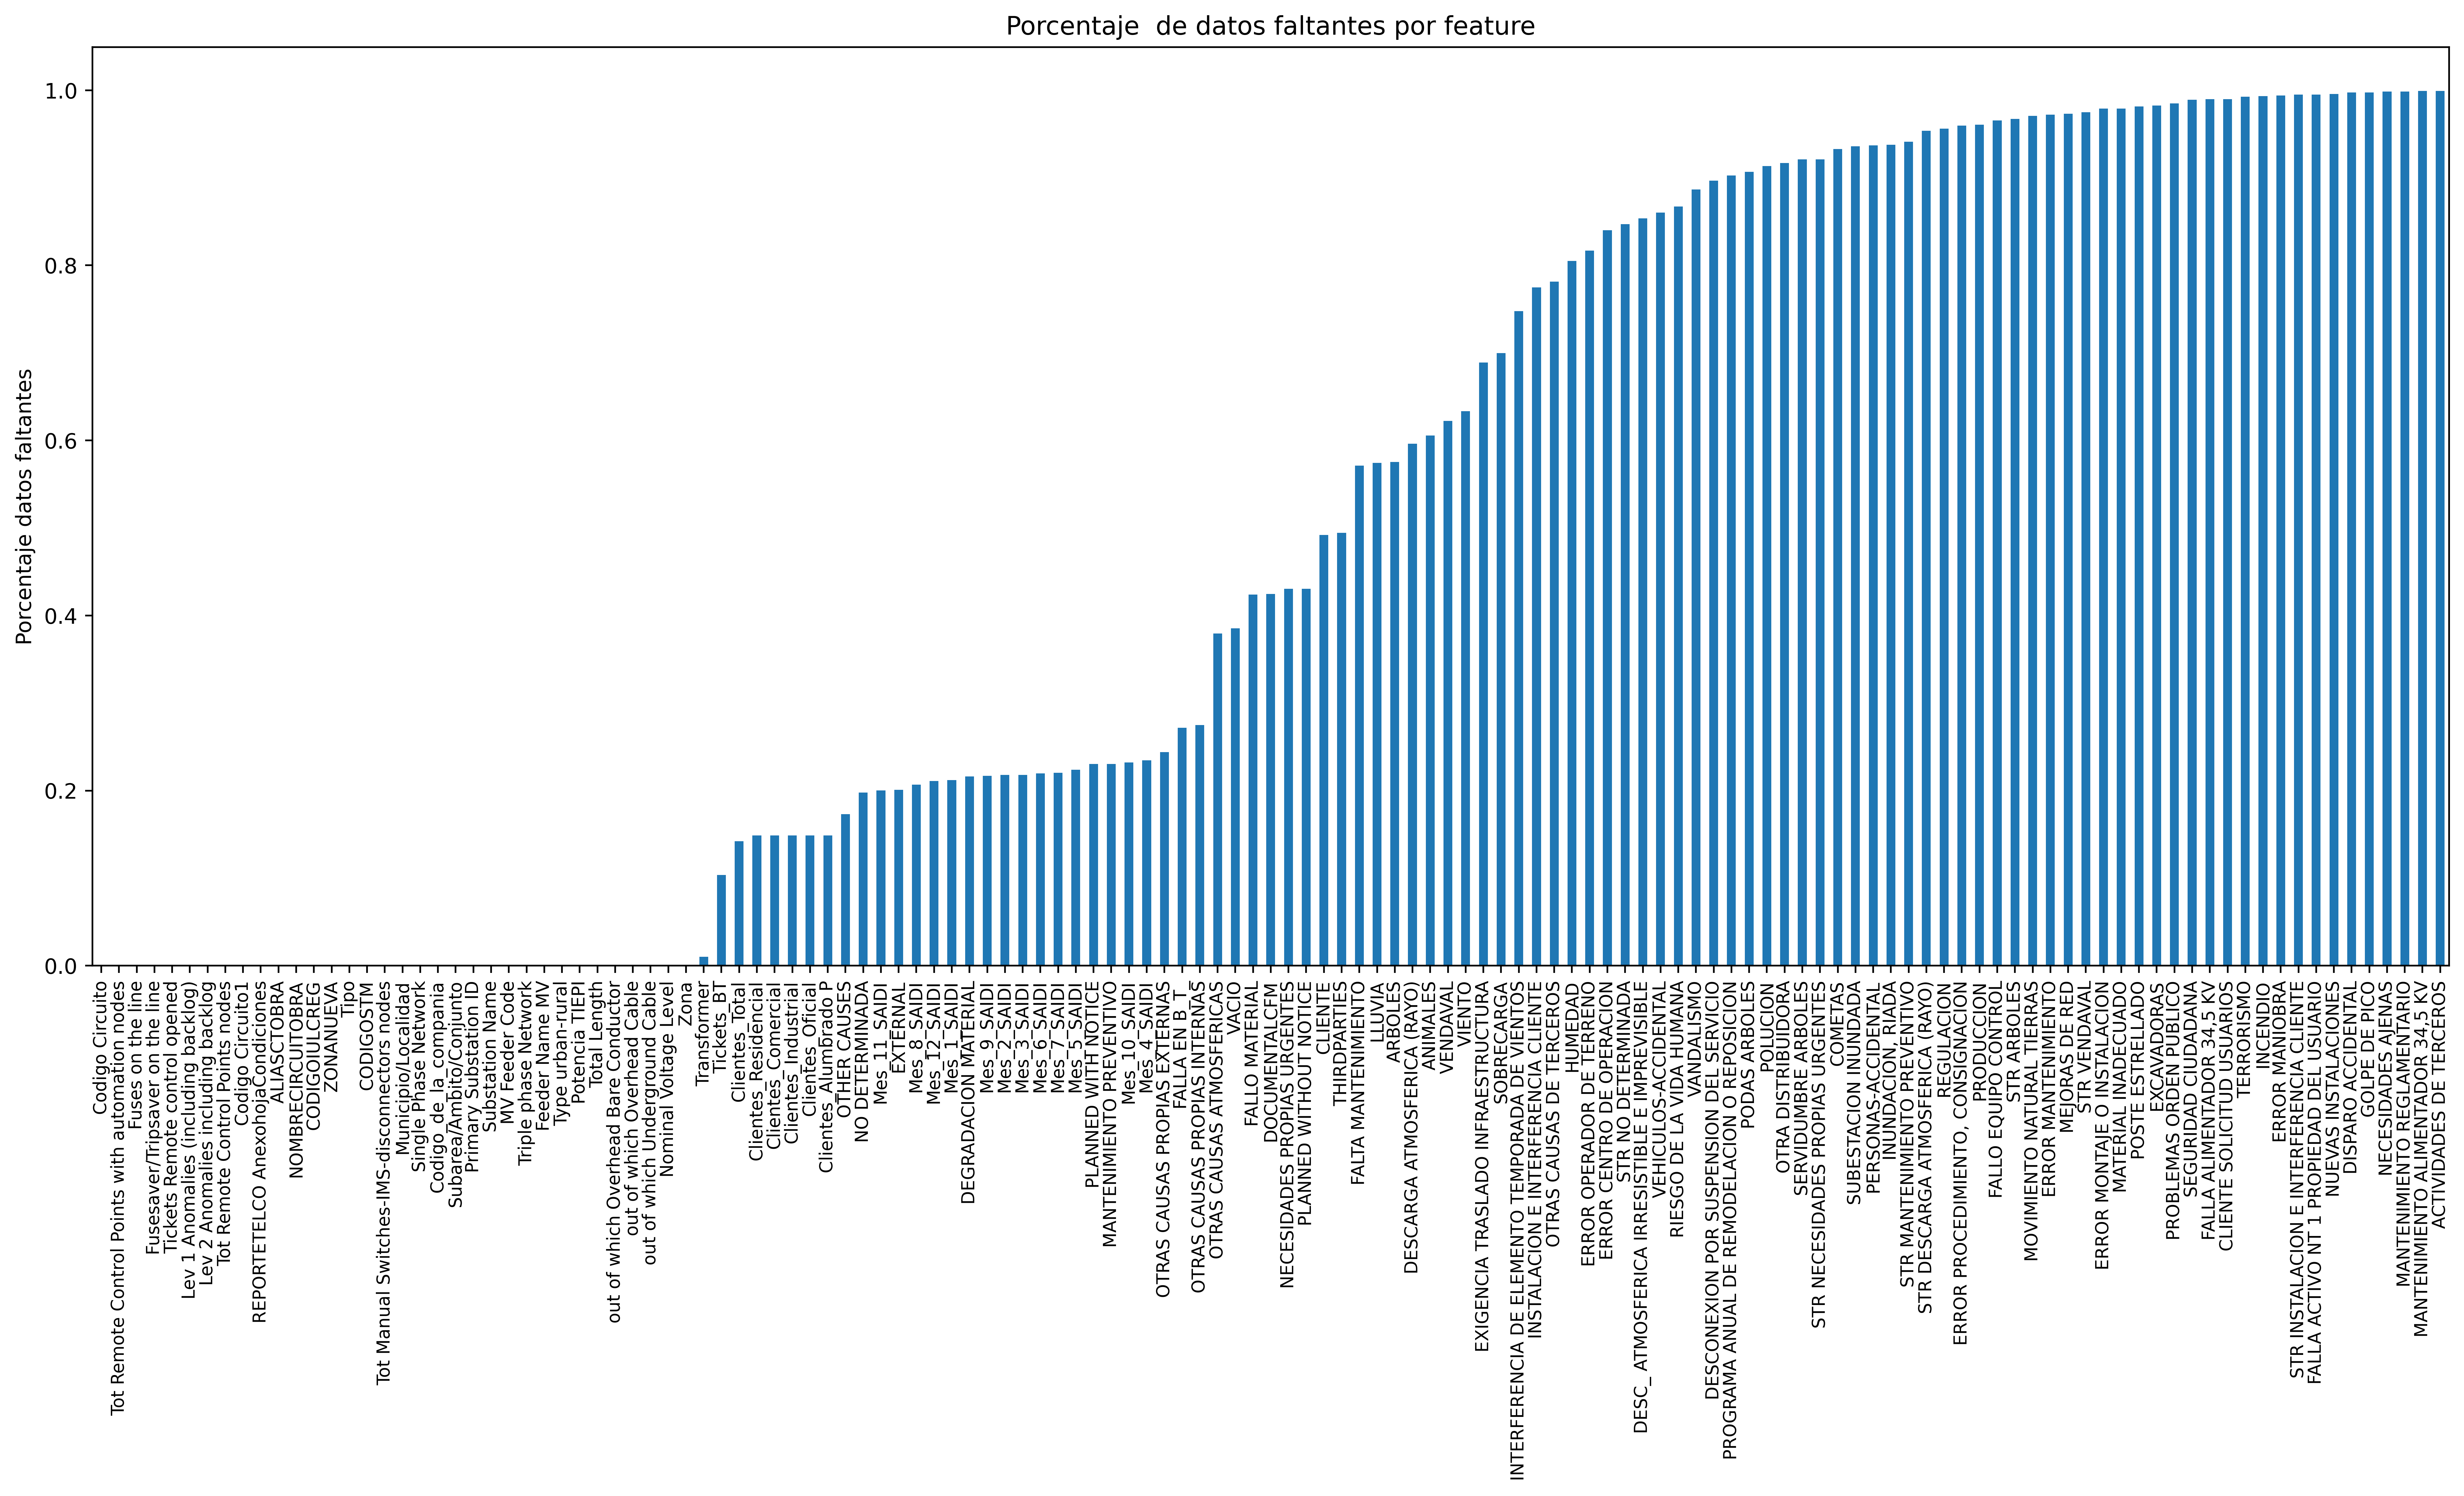

<Figure size 3000x2000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 500
circuitos.isna().mean().sort_values().plot(
    kind="bar", figsize=(20, 8),
    title="Porcentaje  de datos faltantes por feature",
    ylabel="Porcentaje datos faltantes");
plt.xticks(fontsize='small', rotation=90)
plt.show()
plt.savefig('hist.svg', format='svg', dpi=1200)

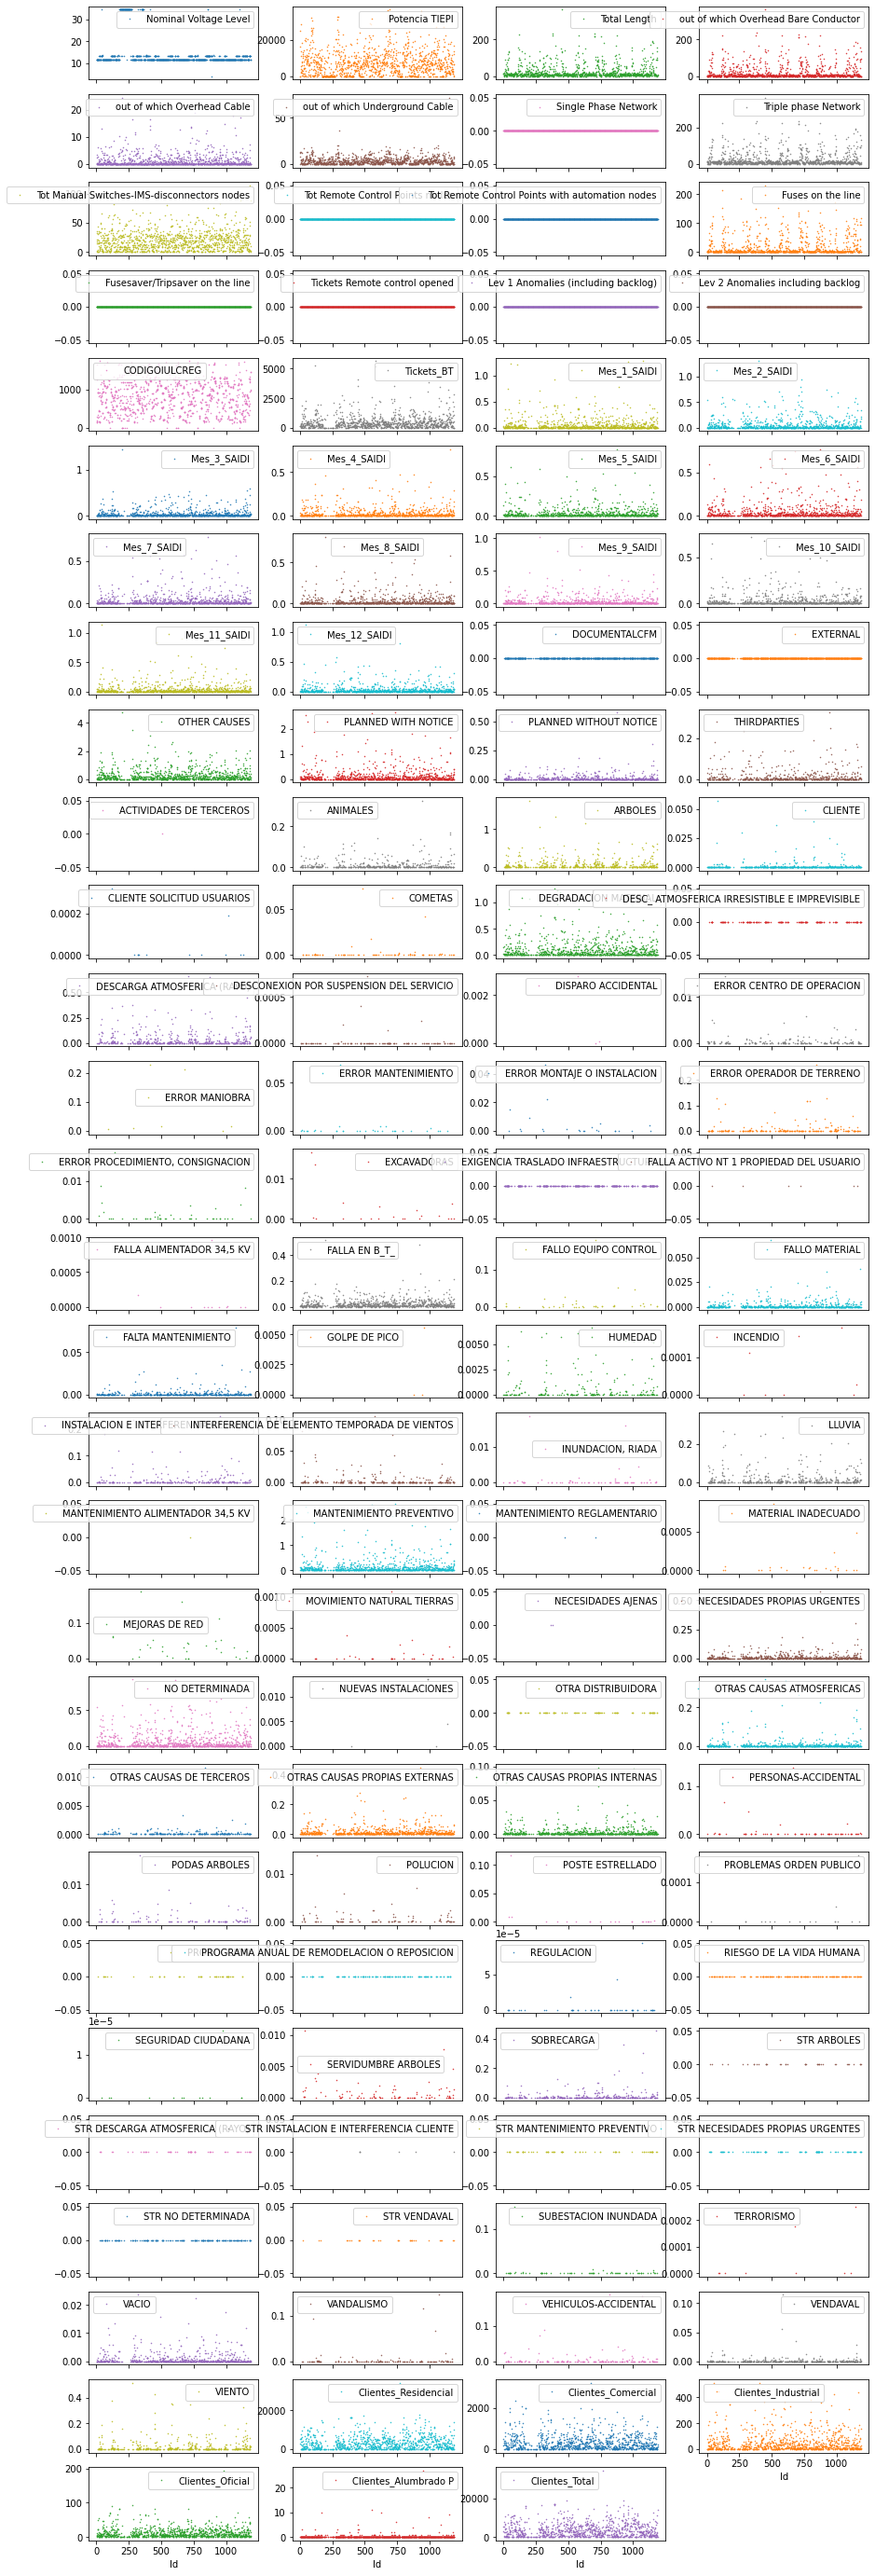

In [ ]:
# Vstazo general de las numericas
circuitos.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 50), markersize=1);

In [ ]:
# Histogramas variables numericas
circuitos.hist(bins=25, figsize=(15, 40), layout=(-1, 5), edgecolor="black")
plt.tight_layout()
plt.savefig('hist.svg', format='svg', dpi=1200)